<a href="https://colab.research.google.com/github/twyeh/AI-in-education/blob/main/01_%E6%A8%99%E6%BA%96%E7%9A%84_Fully_Connected_(Dense)_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### 1. 讀入 MNSIT 數據集

In [3]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 你也可以讀入 Fasion 版的 MNIST

In [ ]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [11]:
n = 20000

In [15]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   9,  19,  29, 216, 254, 254, 167,   9,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  53, 197, 220, 220, 253, 253, 253, 253, 163,   9,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62, 100, 148, 236, 253, 253, 253, 232, 154, 154, 154, 228, 125,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 243, 243, 243,
        250, 253, 253, 254, 248, 231, 222,  47,   0,   0,   0,   8,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 157, 253, 253, 253,
        253, 236, 150, 136,  65,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 243, 253, 253, 172,
        165,  67,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  92, 253, 253, 211,  11,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 167, 253, 253,  98,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  21, 223, 253, 253, 202, 188,
        188, 154, 174, 189, 159,  14,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 163, 253, 253, 253, 253, 253,
        253, 253, 253, 254, 253, 227, 221, 125,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178, 254, 254, 254, 254, 254,
        254, 244, 236, 241, 254, 254, 254, 230,  46,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100, 253, 253, 239, 187, 187,
        120,  54,  34,  44,  77, 121, 251, 253, 188,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 135,  48,  34,   0,   0,
          0,   0,   0,   0,   0,   0, 243, 253, 253,  22,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  53, 249, 253, 207,  11,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  39, 100, 128,   0,   0,   0,
          0,   0,   0,   0,   0, 172, 253, 241, 129,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  65, 237, 219,  79,   0,   0,   0,
          0,   0,   0,  12, 166, 244, 253, 159,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 245, 253, 154,   0,   0,   0,   0,
          0,   9,  60, 236, 253, 253, 248,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 254, 253, 171,  45,  45,  84, 155,
        155, 228, 253, 255, 253, 253, 121,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 221, 253, 253, 253, 253, 253, 253,
        253, 253, 253, 254, 199,  85,  32,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  82,  95, 143,  95, 167, 253, 205,
        234,  61,  33,  33,  10,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [13]:
y_train[n]

np.uint8(5)

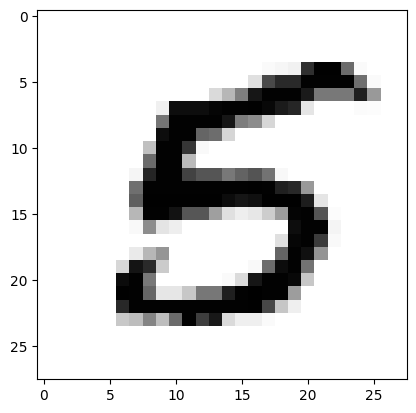

In [16]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [17]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [18]:
x_train[n]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

In [20]:
model = Sequential()

In [21]:
model.add(Dense(100, input_dim=784, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.add(Dense(100, activation='relu'))

In [23]:
model.add(Dense(10, activation='softmax'))

#### 組裝我們的神經網路

In [26]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087),
              metrics=['accuracy'])

#### 欣賞我們的作品

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

### 5. step 2: 訓練

In [28]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2014 - loss: 0.0881
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6246 - loss: 0.0643
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8118 - loss: 0.0342
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8625 - loss: 0.0239
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8814 - loss: 0.0197
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8918 - loss: 0.0177
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8986 - loss: 0.0162
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9058 - loss: 0.0151
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9077 - loss: 0.0145
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9144 - loss: 0.0136
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9154 - loss: 0.0134
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

### 6. step 3: 預測 (testing)

In [29]:
predict = model.predict_classes(x_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [30]:
import numpy as np

# ... other code ...

# Instead of:
# predict = model.predict_classes(x_test)

# Use:
predict_x = model.predict(x_test)
predict = np.argmax(predict_x,axis=1)

# ... rest of the code ...

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


神經網路預測是: 6


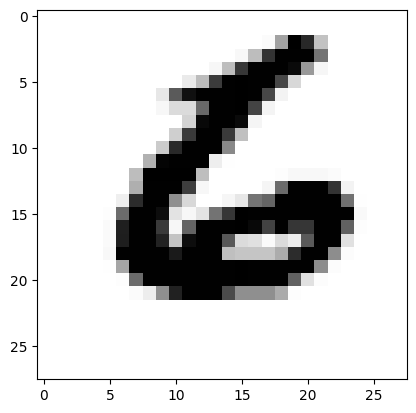

In [31]:
n = 9999

print('神經網路預測是:', predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [34]:
model.save("20250324MNIST_nn.h5")

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'